# 목차
    1. 파일 확인
    2. MMdetection에 쓸 수 있는 txt 만들기
        2-1 목표 txt 파일 만들기
    3. image name txt 파일 만들기(img name 목록)
        

## 파일 확인

In [38]:
from glob import glob
import os

train_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/train_label'))
val_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/val_label'))
test_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/test_label'))

train_img = os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/img')

print(len(train_path), len(val_path), len(test_path), len(train_img))

8000 2000 400 10400


- mac으 작업할 때  계속 .DS_Store가 생기고, 에러가 생긴다.
- 그래서 제거했다.

In [ ]:
# %cd /Users/yunjeongdeok/Project/에이모/aimmo/img
# !rm -rf .DS_Store
# !ls -a

In [41]:
# 확장자(.png, .json)를 제거(슬라이싱)했다.
print(train_path[0][:-4], train_img[0][:-4], sep='\n')

1654739005761_FR-View-CMR-Wide
1659403211965_RR-Right-View-CMR-Narrow


In [44]:
# 계속 확인했다.
count = 0
for i in train_img:
    for j in train_path:
        if i[:-4] ==  j[:-4]:
            count +=1

print(count)

8000


## 2. MMdetection에 쓸 수 있는 txt 만들기

### 필요한 데이터

####  각각의(attribute, xmin, ymin, xmax, ymax).txt를 만들기  
#### => MMdetection에 있는 custom.py를 이용해서 아래와 같은 데이터셋을 만들수 있다



1. filename: 이미지 파일명(디렉토리는 포함하지 않음)
2. width: 이미지 너비
3. height: 이미지 높이
3. ann: bbounding box와 label에 대한 정보를 가지는 Dictionary
    1. bboxes: 하나의 이미지에 있는 여러 Object 들의 numpy array. 4개의 좌표값(좌상단, 우하단)을 가지고, 해당 이미지에 n개의 Object들이 있을 경우 array의 shape는 (n, 4)
    2. labels: 하나의 이미지에 있는 여러 Object들의 numpy array. shape는 (n, )
    3. bboxes_ignore: 학습에 사용되지 않고 무시하는 bboxes. 무시하는 bboxes의 개수가 k개이면 shape는 (k, 4)
    4. labels_ignore: 학습에 사용되지 않고 무시하는 labels. 무시하는 bboxes의 개수가 k개이면 shape는 (k,)

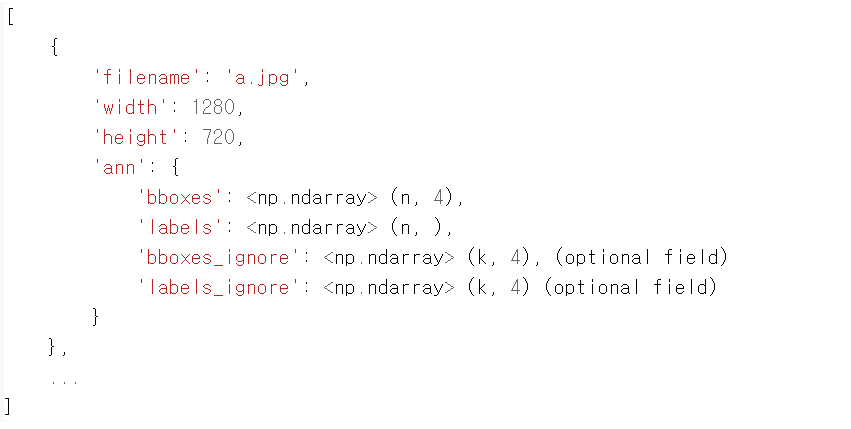

## 2-1 목표 txt 파일 만들기

- 각각의(attribute, xmin, ymin, xmax, ymax).txt

In [31]:
from collections import OrderedDict
from glob import glob
import json
import os


# 이거 쓰면 파일명에 확장자(예: abc.png.txt, abc.jpg.txt 등)도 그대로 하기 적혀서 나온다. 주의 바람.
def json_to_txt(json_path, mov_path):
    # 1. 이미지 file names
    json_path_names = glob(json_path+'/*.json')

    # 2. width, height
    for i in json_path_names:
        with open(i, 'r') as f:
            json_ = json.load(f)
        ann = json_['annotations']

        for i in ann:
            # 아래의 i['points'][0][0]*960/1920, 아래의 i['points'][0][0]*512/1920에서 960, 512는
            # 원본(1920,1024)에서 0.5로 resize한 W,H크기이다.
            x_min, x_max = (i['points'][0][0]*960), (i['points'][2][0]*960)
            y_min, y_max = (i['points'][0][1]*512), (i['points'][2][1]*512)
            att = i['attribute']

            # 라벨.txt 저장
            path = mov_path
            filename = json_['filename']+'.txt'
            if not os.path.exists(f"{path}/{filename}"):# 파일이 없으면
                f = open(f"{path}/{filename}",'w') # 파일 생성, 슬라이싱을 안하면 파일명에 확장자(예: abc.png.txt, abc.jpg.txt 등)도 그대로 하기 적혀서 나온다. 주의 바람.
                f.close()
            with open(f"{path}/{filename}", 'a') as f: # 이어 쓰기, 슬라이싱을 안하면 파일명에 확장자(예: abc.png.txt, abc.jpg.txt 등)도 그대로 하기 적혀서 나온다. 주의 바람.
                    f.writelines(f"{att} {x_min} {y_min} {x_max} {y_max}\n")


train_path = '/Users/yunjeongdeok/Project/에이모/aimmo/train_json'
val_path = '/Users/yunjeongdeok/Project/에이모/aimmo/val_json'
test_path = '/Users/yunjeongdeok/Project/에이모/aimmo/test_json'

mov_foldert_path = '/Users/yunjeongdeok/Project/에이모/aimmo/test_label'
json_to_txt(test_path, mov_foldert_path)


## 2-2 train, val, test로 나누고 나눈 목록(fiile name)을 txt로 만들기

In [54]:
import os
from numpy import random

png = os.listdir('/Users/yunjeongdeok/Project/에이모/size_origin_custum_coco/train/label')
train_png = random.choice(png, size=700, replace=False)
val_png = random.choice(png, size=200, replace=False)
test_png = random.choice(png, size=100, replace=False)


200

In [4]:
import shutil

src_img_path = '/Users/yunjeongdeok/Project/에이모/label'
src_label_path = '/Users/yunjeongdeok/Project/에이모/label'

# 이동시킬 폴더 경로(path)
train_mov_img_path = '/Users/yunjeongdeok/Project/에이모/custum_coco/train_img/'
val_mov_img_path = '/Users/yunjeongdeok/Project/에이모/custum_coco/val_img/'
test_mov_img_path = '/Users/yunjeongdeok/Project/에이모/custum_coco/test_img/'

train_label_path = '/Users/yunjeongdeok/Project/에이모/custum_coco/train_label/'
val_label_path = '/Users/yunjeongdeok/Project/에이모/custum_coco/val_label/'
test_label_path = '/Users/yunjeongdeok/Project/에이모/custum_coco/test_label/'


# for i in png:
#     if i in random_png:
#         # shutil.move(src_img_path+i,train_mov_img_path+i)
#         shutil.move(src_img_path+i,val_mov_img_path+i)
#         # shutil.move(src_img_path+i,test_mov_img_path+i)


In [15]:
random_png = os.listdir(test_mov_img_path)
json = os.listdir('/Users/yunjeongdeok/Project/에이모/label')

print(len(random_png), len(json))

100 1000


In [16]:
for i in json:
    for j in random_png:
        if i[:-4] == j[:]:
            shutil.move(src_label_path+i, test_label_path+i)

## 3. image name txt 파일 만들기(img name 목록)

In [55]:
train_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/train_label'))
val_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/val_label'))
test_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/test_label'))

print(len(train_path), len(val_path), len(test_path), len(train_img))

8000 2000 400 10400


In [57]:
import os

def make_txt_lists(file_lists, mov_path, make_file_name):
    for i in file_lists:
        with open(mov_path + f'/{make_file_name}.txt', 'a') as f: # 이어 쓰기
            f.writelines(f"{i}\n")

train_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/train_label'))
val_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/val_label'))
test_path = sorted(os.listdir('/Users/yunjeongdeok/Project/에이모/aimmo/test_label'))

mov_path = '/Users/yunjeongdeok/Project/에이모/aimmo'
make_txt_lists(train_path, mov_path, 'train')